## Uso de convoluciones

En esta práctica verás cómo utilizar convoluciones.

Junto con las convoluciones, utilizarás técnicas de Pooling, que permiten comprimir imágenes conservando sus características (features).  

## Limitaciones de las DNN

En la práctica de tensorflow creaste una DNN con Keras para artículos de moda con el dataset Fashion de MNIST. Generaste un modelo con una certeza en la predicción muy alta pero con una restricción muy obvia. Las imágenes, tenían 28x28 píxeles, escala de grises y los elementos estaban centrados en la imagen.

Por ejemplo, estas:


![Imagen de un jersey y una bota](https://cdn-images-1.medium.com/max/1600/1*FekMt6abfFFAFzhQcnjxZg.png)


La DNN que creaste aprendió procesando los píxeles en crudo y aprendiendo las relaciones que hacen que esos píxeles formaran un jersey, o las relaciones que hacen que formara una bota. Pero, ¿cómo clasificaría esta imagen?

![imagen de bota](https://cdn.pixabay.com/photo/2013/09/12/19/57/boots-181744_1280.jpg)

Aunque está muy claro que hay unas botas en la imagen, el clasificador fallaría por muchas razones: 
* Primero, la imagen no mide 28x28 ni está en escala de grises.
* Segundo, el clasificador está entrenando con los píxeles en crudo mostrando la parte izquierda de la bota y no con las características que hacen que el objeto, sea una bota.

Las convoluciones son muy potentes. Una convolución es un filtro para procesar una imagen y extraer sus características que muestran algo en común en la imagen. 

Generar convoluciones es muy simple: simplemente escanea cada píxel de la imagen y luego mira los píxeles vecinos. Multiplica los valores de estos píxeles por los pesos equivalentes en un filtro.

Entonces, por ejemplo, fíjate esta imagen:

![Imagen convolucionada](https://fp.cloud.riberadeltajo.es/ia/convolucion.png)

Se especifica una convolución de 3x3

El valor actual del pixel es 192, pero puedes calcular el nuevo valor mirando a los valores de los vecinos y multiplicándolos por los valores especificados en el filtro, para asignar el nuevo valor del pixel con la cantidad final

Exploremos cómo funcionan las convoluciones creando una convolución básica en una imagen en escala de grises 2D. Primero podemos cargar la imagen tomando la imagen de 'ascenso' de scipy. Es una bonita imagen integrada con muchos ángulos y líneas.

importamos algunas librerías de python.

In [29]:
import cv2
import numpy as np
from scipy import datasets
i = datasets.ascent()
print(i.dtype)

uint8


pintamos la imagen con pyplot

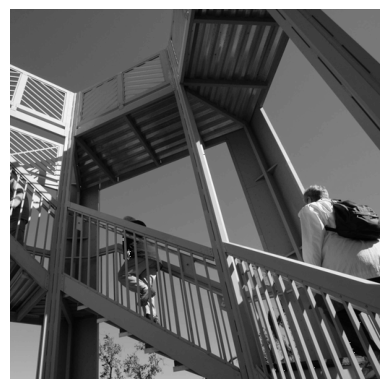

In [30]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

Podemos ver que esta es una imagen de una escalera. Hay muchas características aquí con las que podemos jugar para ver si podemos aislarlas, por ejemplo, hay líneas verticales fuertes.

La imagen se almacena como una matriz numpy, por lo que podemos crear la imagen transformada simplemente copiando esa matriz. También obtengamos las dimensiones de la imagen para que podamos recorrerla más tarde.

In [31]:
i = i.astype(np.int64)
i_transformed=i.copy()
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

Podemos crear un filtro como un array de 3x3

In [32]:
# Este filtro marca los bordes 
# Crea una convolución que procesa los bordes marcados y líneas rectas

# Experimenta con diferentes valores para ver efectos graciosos.
filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]


# Si todos los dígitos del filtro no suman 0 o no suman 1, 
# probablemente deberías repesarlos para que sumen 0 o 1, 
# por ejemplo, si tus dígitos del filtro son 1,1,1 1,2,1 1,1,1, que suman 10
# dberías multiplicarlos por un peso de 0.1 para normalizarlos
weight  = 1

Ahora vamos a crear una convolución. Iteramos sobre la imagen, dejando un margen de 1 píxel, y multiplicamos cada uno de los vecinos del píxel actual por el valor definido en el filtro.

es decir, el vecino del píxel actual arriba y a la izquierda se multiplicará por el elemento superior izquierdo en el filtro, etc., etc. Luego multiplicaremos el resultado por el peso y luego nos aseguraremos de que el resultado esté en el rango 0-255

Finalmente cargaremos el nuevo valor en la imagen transformada. GUARDA ESTE CÓDIGO PARA EL EJERCICIO!

In [33]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

Volvemos a mostrar la imagen para ver el efecto de la convolución!

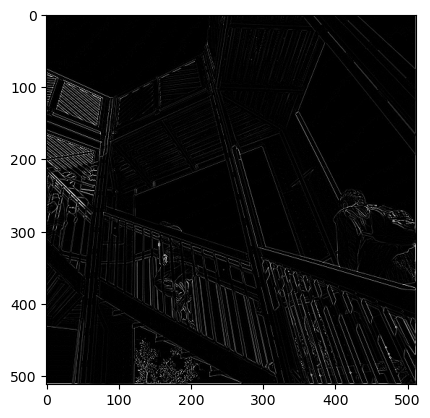

In [34]:
# Mostrar la imagen. Fíjate en el tamaño de los ejes -- son 512x512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

Fíjate en los valores del filtro y su impacto en la imagen: Experimenta con cada uno de ellos!

Utilizando -1,0,1,-2,0,2,-1,0,1 nos da un potente conjunto de líneas verticales:

![imagen1-convo](https://fp.cloud.riberadeltajo.es/ia/convolucion2.png)

y utilizando -1, -2, -1, 0, 0, 0, 1, 2, 1 nos da líneas horizontales:

![imagen1-convo](https://fp.cloud.riberadeltajo.es/ia/convolucion3.png)

Carga una imagen y aplícale los siguientes filtros: 
#### Filtros Laplace:
```python
# Filtro de Laplace
filter_laplace = [
    [0, -1, 0], 
    [-1, 4, -1], 
    [0, -1, 0]
]
```
#### Laplaciano del Gaussiano
```python
filter_laplacian_gaussian = [
    [0, -1, 0], 
    [-1, 8, -1], 
    [0, -1, 0]
]
```
#### Filtro Gaussiano Borroso
```python
filter_gaussian_blur = [
    [1/16, 1/8, 1/16], 
    [1/8, 1/4, 1/8], 
    [1/16, 1/8, 1/16]
]
```
Puedes usar la función que viene a continuación:

In [35]:
def apply_filter(i, filter, weight):
    """
    Aplica un filtro 3x3 a una imagen utilizando convolución manual.

    Args:
        i (ndarray): Imagen de entrada como matriz 2D.
        filter (list): Filtro 3x3 a aplicar.
        weight (float): Factor de ponderación para el resultado de la convolución.

    Returns:
        ndarray: Imagen transformada después de aplicar el filtro.
    """
    # Obtener dimensiones de la imagen
    size_x, size_y = i.shape

    # Crear una copia de la imagen para almacenar el resultado
    i = i.copy().astype(dtype=np.int64)
    i_transformed=i.copy()

    # Aplicar el filtro
    for x in range(1, size_x - 1):
        for y in range(1, size_y - 1):
            convolution = 0.0
            convolution += i[x - 1, y - 1] * filter[0][0]
            convolution += i[x, y - 1] * filter[0][1]
            convolution += i[x + 1, y - 1] * filter[0][2]
            convolution += i[x - 1, y] * filter[1][0]
            convolution += i[x, y] * filter[1][1]
            convolution += i[x + 1, y] * filter[1][2]
            convolution += i[x - 1, y + 1] * filter[2][0]
            convolution += i[x, y + 1] * filter[2][1]
            convolution += i[x + 1, y + 1] * filter[2][2]
            convolution *= weight

            # Clampear el resultado entre 0 y 255
            convolution = max(0, min(255, convolution))

            # Asignar el valor al pixel transformado
            i_transformed[x, y] = convolution

    return i_transformed.astype(np.uint8)


In [36]:
# carga una imagen en escala de grises (p.ej. pomeranian.png) y muestra la foto original
# con el filtro sobel_x:
filter_sobel_x = [
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
]
weight = 1.0



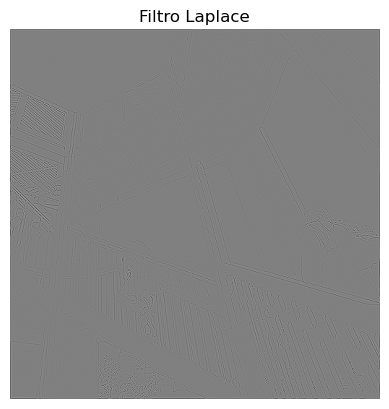

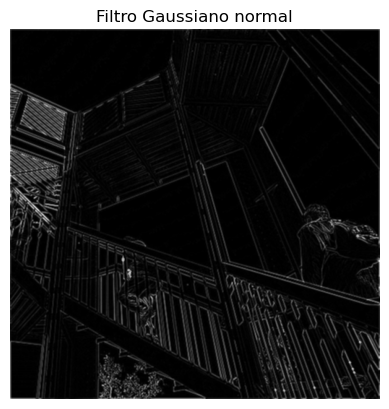

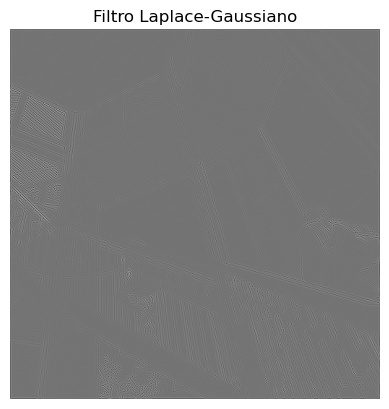

In [37]:
# Carga una imagen en escala de grises con matplotlib
# y aplica el filtro siguiente
filter_gaussian_blur_intense = [
    [1/9, 3/9, 3/9],
    [3/9, 4/9, 3/9],
    [3/9, 3/9, 3/9]
]

#aplica ahora los filtro de laplace, laplace-gaussiano, y gaussian-blur [normal]
# (los que vienen arriba)
filter_laplace = [
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
]

filter_gaussian_blur = [
    [1/16, 2/16, 1/16],
    [2/16, 4/16, 2/16],
    [1/16, 2/16, 1/16]
]

filter_laplace_gauss = []
for i in range(3):
    fila = []
    for j in range(3):
        fila.append(filter_laplace[i][j] + filter_gaussian_blur[i][j])
    filter_laplace_gauss.append(fila)
    
img_laplace = cv2.filter2D(i_transformed.astype(np.float32), -1, np.array(filter_laplace, dtype=np.float32))
img_gaussian = cv2.filter2D(i_transformed.astype(np.float32), -1, np.array(filter_gaussian_blur, dtype=np.float32))
img_laplace_gauss = cv2.filter2D(i_transformed.astype(np.float32), -1, np.array(filter_laplace_gauss, dtype=np.float32))

plt.imshow(img_laplace, cmap='gray')
plt.title('Filtro Laplace')
plt.axis('off')
plt.show()

plt.imshow(img_gaussian, cmap='gray')
plt.title('Filtro Gaussiano normal')
plt.axis('off')
plt.show()

plt.imshow(img_laplace_gauss, cmap='gray')
plt.title('Filtro Laplace-Gaussiano')
plt.axis('off')
plt.show()

### Utiliza convolve2d de scipy para mostrar una imagen y su convolución:

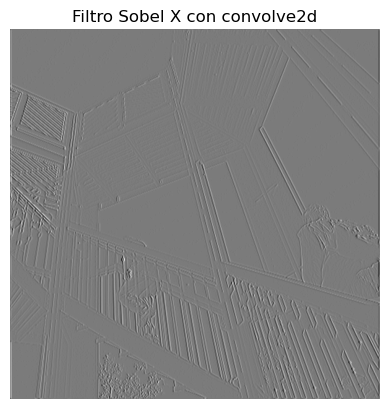

In [38]:
from scipy.signal import convolve2d

imagen_normalizada = i_transformed / 255.0

# aplica filtros ahora a una imagen, pero esta vez con covolve2d, de scipy.signal
filter_sobel_x = [
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
]

# Ej de cómo aplicar una convolución con convolve2d
imagen_filtrada = convolve2d(imagen_normalizada, filter_sobel_x, mode='same', boundary='fill', fillvalue=0)

plt.imshow(imagen_filtrada, cmap='gray')
plt.title('Filtro Sobel X con convolve2d')
plt.axis('off')
plt.show()    

### Utiliza una capa Conv2d de torch para aplicar un filtro de convolución

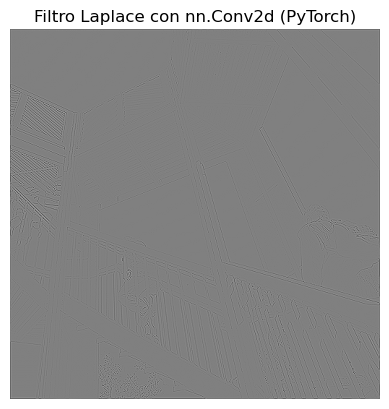

In [39]:
# Aplica filtros ahora con la función nn.Conv2d de pytorch
import torch
import torch.nn as nn

imagen_tensor = torch.tensor(i_transformed, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

filtro = torch.tensor(
    [[[[
        0, 1, 0,
    ],
    [1, -4, 1],
    [0, 1, 0]]]], dtype=torch.float32)

conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1, bias=False)

with torch.no_grad():
    conv.weight.copy_(filtro)

imagen_filtrada = conv(imagen_tensor)

# Si no uso detach, me sale error.
plt.imshow(imagen_filtrada.squeeze().detach().numpy(), cmap='gray')
plt.title('Filtro Laplace con nn.Conv2d (PyTorch)')
plt.axis('off')
plt.show()

## Pooling (Agrupación)

Además de usar convoluciones, la agrupación nos ayuda mucho a detectar características. El objetivo es reducir la cantidad total de información en una imagen, manteniendo las características que se detectan como presentes.

Hay varios tipos diferentes de Pooling, pero para esta práctica usaremos uno llamado agrupación MAX.

 La idea aquí es iterar sobre la imagen y observar el píxel y sus vecinos inmediatos a la derecha, debajo y justo debajo. Tomamos el más grande (de ahí el nombre de agrupación MAX) de ellos y lo cargamos en la nueva imagen. Por lo tanto, la nueva imagen tendrá 1/4 del tamaño de la anterior, con las dimensiones en X e Y reducidas a la mitad por este proceso. ¡Verás que las características se mantienen a pesar de esta compresión!

![pooling.png](https://fp.cloud.riberadeltajo.es/ia/resultado_pooling.png)

Este código mostrará una agrupación (2, 2). Ejecútalo para ver el resultado y verás que aunque la imagen tiene 1/4 del tamaño del original, ¡las características extraídas se mantienen!

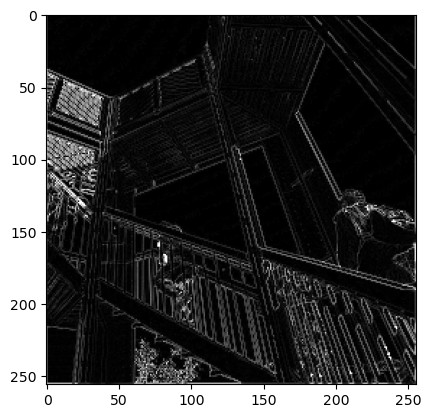

In [40]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    #cogemos agrupaciones de cuatro pixels
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    maximo=max(pixels)
    #añadimos el pixel a la nueva imagen
    newImage[int(x/2),int(y/2)] = maximo


# Visualiza la imagen: observa que ahora el tamaño de los ejes es 256x256
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()      
    


Utiliza ahora las capas MaxPooling2D y AveragePooling2D de keras

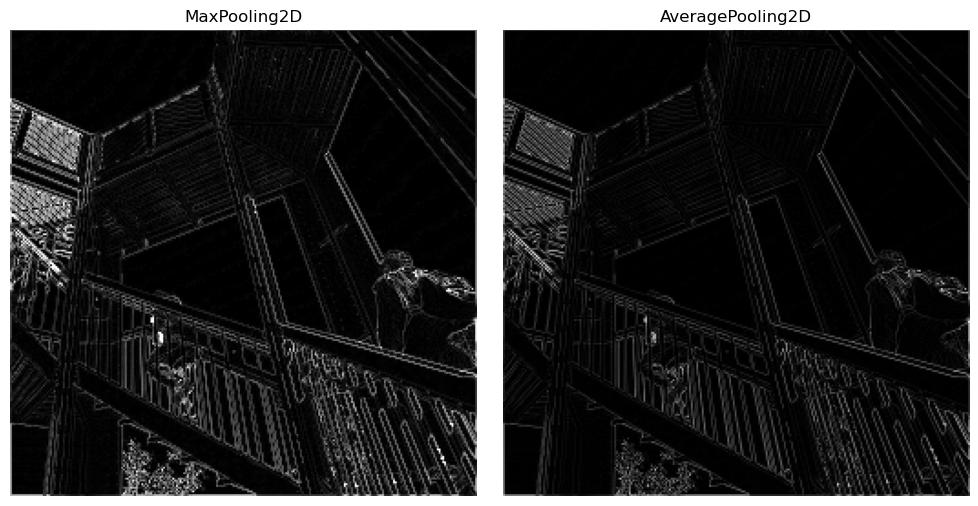

In [41]:
#Utiliza ahora las capas de tensorflow para hacer Pooling (MaxPooling2D, AveragePooling2D)
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D


# Deberás:
# a) Convertir la imagen a formato 4D para que sea compatible con Keras (Batch, Height, Width, Channels)
image_tensor = tf.convert_to_tensor(i_transformed, dtype=tf.float32)
image_tensor = tf.expand_dims(image_tensor, axis=0)  # Añadir batch dimension
image_tensor = tf.expand_dims(image_tensor, axis=-1)  # Añadir canal dimension (para grayscale)

# Crear capas de pooling
max_pool = MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid')
avg_pool = AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid')
  
# Aplicar las capas a la imagen
max_pooled = max_pool(image_tensor)
avg_pooled = avg_pool(image_tensor)

# Convertir las salidas a NumPy para visualización
max_pooled_np = max_pooled.numpy().squeeze()
avg_pooled_np = avg_pooled.numpy().squeeze()

# visualiza las imagenes transformadas
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(max_pooled_np, cmap='gray')
plt.title('MaxPooling2D')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(avg_pooled_np, cmap='gray')
plt.title('AveragePooling2D')
plt.axis('off')

plt.tight_layout()
plt.show()
